# <span style='font-family:Georgia'> <span style='background:yellow'> **Email/SMS Spam Classifier in Python**  </span>



### <span style='color:Blue'> We all face the problem of spams in our inboxes. Let’s build a spam classifier program in python which can tell whether a given message is spam or not!.  </span>


### 

## Loading dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Loading Data

In [2]:
### reading the dataset
df = pd.read_csv("sms_spam.csv",encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
### checking shape of the dataset
df.shape

(5572, 5)

##  Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
### droping columns 2,3 & 4 as there are very few non-null rows
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
### renaming the column names
df.rename({"v1":"target","v2":"text"},axis=1,inplace=True)

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [9]:
### maping ham = 0 & spam = 1
df["target"] = df.target.map({"ham":0,"spam":1})

In [10]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
### checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
### checking missing values
df.duplicated().sum()

403

In [13]:
### removing duplictate values
df = df.drop_duplicates(keep="first")

In [14]:
df.shape

(5169, 2)




## EDA (Exploratory Data Analysis)





0    4516
1     653
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

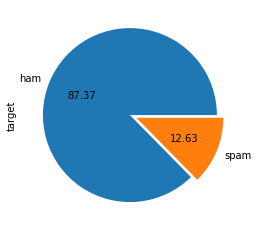

In [15]:
print(df.target.value_counts())
df.target.value_counts().plot(kind="pie",labels=["ham","spam"],autopct="%0.2f",explode=[0,0.08])

#### Observations:
    - Approx 13% SMS are spam & 87% SMS are ham in the dataset
    - So the data is imbalance

In [16]:
### num of characters in every row of the text column
df["num_char"] = df.text.str.len()
df["num_char"].head()

0    111
1     29
2    155
3     49
4     61
Name: num_char, dtype: int64

In [17]:
### installing Natural Language Toolkit (NLTK)
!pip install nltk

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
### num of words in every row of the text column
df["num_word"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df["num_word"].head()

0    24
1     8
2    37
3    13
4    15
Name: num_word, dtype: int64

In [20]:
### num of sentences in each row of text column
df["num_sentence"] = df.text.apply(lambda x:len(nltk.sent_tokenize(x)))
df["num_sentence"].head()

0    2
1    2
2    2
3    1
4    1
Name: num_sentence, dtype: int64

In [21]:
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[["num_char","num_word","num_sentence"]].describe()

,num_char,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
### describe for ham (0) messages
df[df["target"]==0][["num_char","num_word","num_sentence"]].describe()

,num_char,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
### describe for spam (1) messages
df[df["target"]==1][["num_char","num_word","num_sentence"]].describe()

,num_char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


##  Visualizing data

In [25]:
ham_char = df[df["target"]==0]["num_char"]
spam_char = df[df["target"]==1]["num_char"]

print(ham_char.head(5))
print("")
print(spam_char.head(5))


0    111
1     29
3     49
4     61
6     77
Name: num_char, dtype: int64

2     155
5     148
8     158
9     154
11    136
Name: num_char, dtype: int64


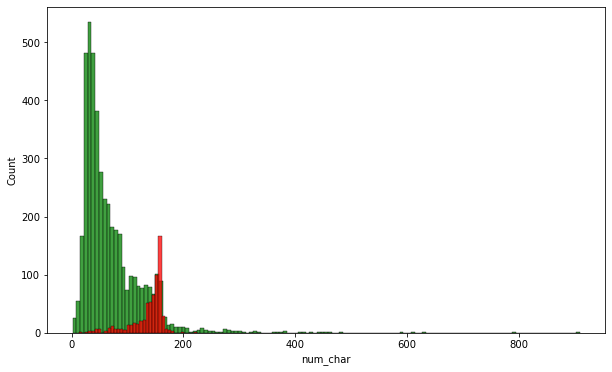

In [26]:
### histplot for num_char
plt.figure(figsize=(10,6))
sns.histplot(ham_char,color="g")
sns.histplot(spam_char,color='red')
plt.show()

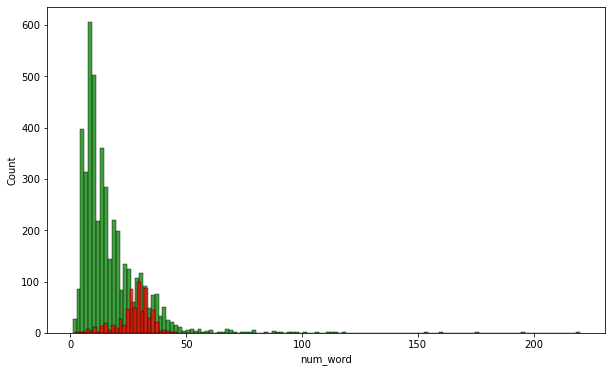

In [27]:
### histplot for num_word
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_word"],color="g")
sns.histplot(df[df["target"]==1]["num_word"],color='red')
plt.show()

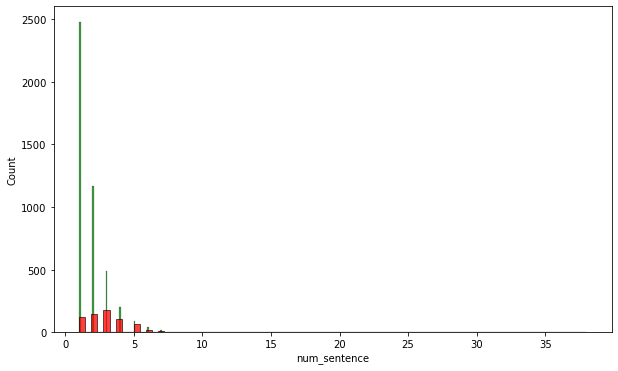

In [28]:
### histplot for num_sentence
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_sentence"],color="g")
sns.histplot(df[df["target"]==1]["num_sentence"],color='red')
plt.show()

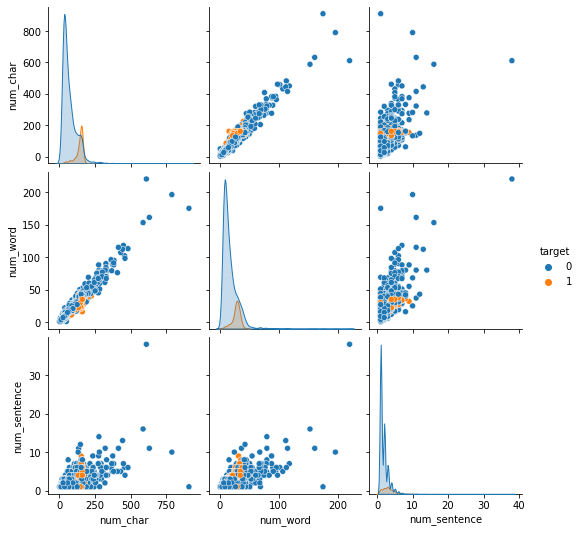

In [29]:
### Pairplot
sns.pairplot(df,hue="target")
plt.show()

###  correlation

In [30]:
corr = df.corr()
corr

,target,num_char,num_word,num_sentence
target,1.000000,0.384717,0.262969,0.267602
num_char,0.384717,1.000000,0.965784,0.626118
num_word,0.262969,0.965784,1.000000,0.680882
num_sentence,0.267602,0.626118,0.680882,1.000000


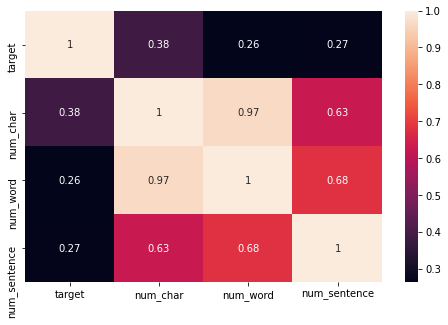

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)
plt.show()

 - here we can see there is high correlation with the data
 - correlation of num_char & num_word with num_sentence is high
 - correlation of num_char with num_word is high


### 

## Text Preprocessing 
        - Lower case
        - Tokenization
        - Removing special characters
        - Removing stop words and punctuation
        - Stemming (extract the base form of the words by removing affixes from them)

In [32]:
# import nltk
# from nltk.corpus import stopwords

from nltk.corpus import stopwords

# import nltk
# nltk.download('stopwords')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("laughing")

'laugh'

In [35]:
def transform_txt(txt):
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    
    
    y = []
    for i in txt:
        if i.isalnum():
            y.append(i)
            
    txt = y[:]
    y.clear()
    
    for i in txt:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    txt = y[:]
    y.clear()
    
    for i in txt:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [36]:
### this is how transform_txt will work
transform_txt("Hello guys! this is my ML project. Hope you guys to going like it")

'hello guy ml project hope guy go like'

In [37]:
### creating a sperate column for transformed_txt
df["transformed_txt"] = df["text"].apply(transform_txt)

In [38]:
df.sample(5)

,target,text,num_char,num_word,num_sentence,transformed_txt
3026,0,You still at the game?,22,6,1,still game
1092,0,Where r we meeting?,19,5,1,r meet
324,0,No problem. How are you doing?,30,8,2,problem
3182,0,Dunno i juz askin cos i got a card got 20% off...,112,31,1,dunno juz askin co got card got 20 4 salon cal...
5556,0,Yes i have. So that's why u texted. Pshew...mi...,63,17,3,ye u text pshew miss much


###  Using WordCloud

In [39]:
# !pip install wordcloud
from wordcloud import WordCloud 

In [40]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white",prefer_horizontal=0.9)

In [41]:
### for spam messages
spam_wc = wc.generate(df[df["target"]==1]["transformed_txt"].str.cat(sep=" "))

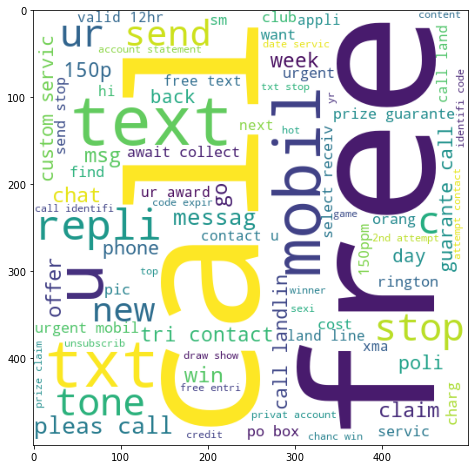

In [42]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [43]:
### for ham messages
ham_wc = wc.generate(df[df["target"]==0]["transformed_txt"].str.cat(sep=" "))

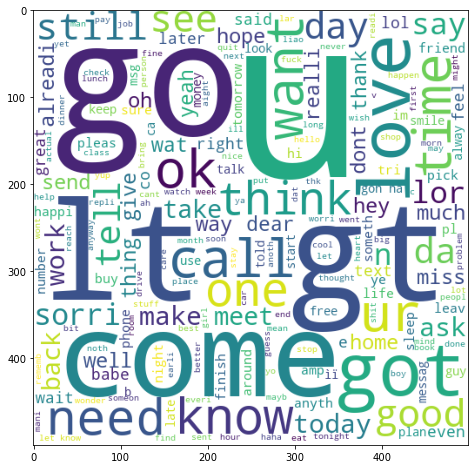

In [44]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.show()

### Top 20 words used in all ham messages

In [45]:
ham_20 = df[df["target"]==0]["transformed_txt"].tolist()
ham_20

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [46]:
w1 = []
for i in ham_20:
    for j in i.split(" "):
        w1.append(j)

In [47]:
print(len(w1))

35411


In [48]:
from collections import Counter
cmn_ham = pd.DataFrame(Counter(w1).most_common(20))
cmn_ham

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


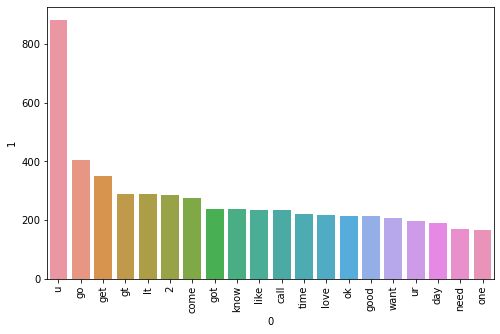

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(cmn_ham[0],cmn_ham[1])
plt.xticks(rotation="vertical")
plt.show()

###  Top 20 words used in all spam messages

In [50]:
spam_20 = df[df["target"]==1]["transformed_txt"].tolist()
spam_20

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [51]:
w2 = []
for i in spam_20:
    for j in i.split(" "):
        w2.append(j)

In [52]:
print(len(w2))

9939


In [53]:
from collections import Counter
cmn_spam = pd.DataFrame(Counter(w2).most_common(20))
cmn_spam

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


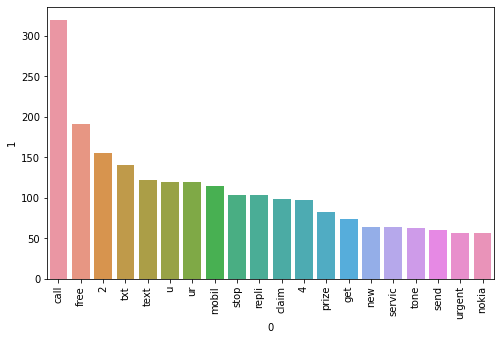

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(cmn_spam[0],cmn_spam[1])
plt.xticks(rotation="vertical")
plt.show()

### 

## Model Building

In [112]:
### changing our text categorical data into numeric data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [113]:
X = tfidf.fit_transform(df["transformed_txt"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
print("SMS-5169 & Words-6708")
X.shape

SMS-5169 & Words-6708


(5169, 3000)

In [115]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [117]:
### spliting the data into train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [118]:
### using GaussianNB naive_bayes clasiffier
from sklearn.naive_bayes import BernoulliNB
gnb = GaussianNB()
bnb = BernoulliNB()

In [131]:
### using bnb
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

print("accuracy_score :", accuracy_score(y_test,y_pred_bnb))
print("precision_score :", precision_score(y_test,y_pred_bnb))
print("confusion_matrix :", confusion_matrix(y_test,y_pred_bnb))

accuracy_score : 0.9835589941972921
precision_score : 0.991869918699187
confusion_matrix : [[895   1]
 [ 16 122]]


In [120]:
### using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 50, random_state=2)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

print("accuracy_score :", accuracy_score(y_test,y_pred_rfc))
print("precision_score :", precision_score(y_test,y_pred_rfc))
print("confusion_matrix :", confusion_matrix(y_test,y_pred_rfc))

accuracy_score : 0.9758220502901354
precision_score : 0.9829059829059829
confusion_matrix : [[894   2]
 [ 23 115]]


In [129]:
### using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=None)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)

print("accuracy_score :", accuracy_score(y_test,y_pred_abc))
print("precision_score :", precision_score(y_test,y_pred_abc))
print("confusion_matrix :", confusion_matrix(y_test,y_pred_abc))

accuracy_score : 0.960348162475822
precision_score : 0.9292035398230089
confusion_matrix : [[888   8]
 [ 33 105]]


In [122]:
### using LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs",penalty="l2")
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print("accuracy_score :", accuracy_score(y_test,y_pred_lr))
print("precision_score :", precision_score(y_test,y_pred_lr))
print("confusion_matrix :", confusion_matrix(y_test,y_pred_lr))

accuracy_score : 0.9564796905222437
precision_score : 0.979381443298969
confusion_matrix : [[894   2]
 [ 43  95]]


In [130]:
###using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier  
knnc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knnc.fit(X_train,y_train)
y_pred_knnc = knnc.predict(X_test)

print("accuracy_score :", accuracy_score(y_test,y_pred_knnc))
print("precision_score :", precision_score(y_test,y_pred_knnc))
print("confusion_matrix :", confusion_matrix(y_test,y_pred_knnc))

accuracy_score : 0.9052224371373307
precision_score : 1.0
confusion_matrix : [[896   0]
 [ 98  40]]


In [132]:
### using voting classifier
# from sklearn.ensemble import VotingClassifier
# rfc = RandomForestClassifier(n_estimators= 50, random_state=2)
# lr = LogisticRegression(solver="lbfgs",penalty="l2")
# bnb = BernoulliNB()

In [133]:
# voting = VotingClassifier(estimators=[('rfc',rfc),('lr',lr),('bnb',bnb)],voting='soft')

In [134]:
# voting.fit(X_train,y_train)

In [135]:
# y_pred_vot = voting.predict(X_test)
# print("accuracy_score :", accuracy_score(y_test,y_pred_vot))
# print("precision_score :", precision_score(y_test,y_pred_vot))

# 

## Pickling the required files

In [138]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))